# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Andi Cici Amalia]
- **Email:** [andiciciamalia@gmail.com]
- **ID Dicoding:** [ANDI CICI AMALIA]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Kategori produk apa yang memiliki jumlah pesanan terbanyak dan menghasilkan pendapatan tertinggi
- Pertanyaan 2: Apakah ada hubungan antara durasi pengiriman pesanan dan rating yang diberikan oleh pelanggan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data & Assesing

In [2]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [9]:
#cek data duplikasi berdasarkan customer_id
customers_df.duplicated(subset='customer_id').sum()

np.int64(0)

In [8]:
#cek data duplikasi berdasarkan customer_unique_id
customers_df['customer_unique_id'].nunique()

96096

In [5]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [18]:
orders_df = pd.read_csv('olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       11808 non-null  object
 1   customer_id                    11808 non-null  object
 2   order_status                   11808 non-null  object
 3   order_purchase_timestamp       11808 non-null  object
 4   order_approved_at              11784 non-null  object
 5   order_delivered_carrier_date   11611 non-null  object
 6   order_delivered_customer_date  11476 non-null  object
 7   order_estimated_delivery_date  11808 non-null  object
dtypes: object(8)
memory usage: 738.1+ KB


In [49]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,24
order_delivered_carrier_date,197
order_delivered_customer_date,332
order_estimated_delivery_date,0


In [27]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,11808,11808,11808,11808,11784,11611,11476,11808
unique,11808,11808,7,11799,11624,11196,11463,426
top,ce6d150fb29ada17d2082f4847107665,d8acb46c718975948423dbf1b603b959,delivered,2017-08-10 11:58:33,2018-04-17 05:50:27,2018-05-09 15:48:00,2018-06-29 20:42:45,2017-12-20 00:00:00
freq,1,1,11475,2,3,7,2,78


In [70]:
product_df = pd.read_csv('olist_products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [72]:
product_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [73]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [75]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [34]:
seller_df = pd.read_csv('olist_sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [35]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [38]:
seller_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [36]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [40]:
order_item_df = pd.read_csv('olist_order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [42]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [46]:
order_item_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [47]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())
order_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [39]:
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [41]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [44]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [48]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [63]:
order_reviews_df['review_score'].value_counts().sort_index()


,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


**Insight:**
- Tidak ada duplikat data pada seluruh dataset
- Pada dataset order untuk kolom order_delivered_carrier_date, order_delivered_customer_date, dan order_approved_at memiliki beberapa missing values, kemungkinan karena order belum selesai diproses atau dibatalkan.
- Pada dataset product untuk kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty memiliki sejumlah missing values
- Pada dataset order reviews untuk kolom review_comment_title dan review_comment_message mengandung missing values, wajar karena pelanggan bisa saja tidak memberikan komentar, hanya rating.

### Cleaning Data

In [67]:
# Dataset Order
# Ubah kolom waktu ke format datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']
orders_df[date_cols] = orders_df[date_cols].apply(pd.to_datetime, format='mixed')

# Buat kolom durasi pengiriman
orders_df['delivery_duration'] = (
    orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
).dt.days

# Buang baris dengan tanggal tidak logis (opsional)
orders_df = orders_df[orders_df['delivery_duration'] >= 0]


In [79]:
# Dataset Product
# Mengisi missing values pada kategori produk dengan 'unknown' agar tetap bisa digunakan dalam agregasi.
product_df ['product_category_name'] = product_df['product_category_name'].fillna('unknown')

# Menghapus baris dengan nilai 0 atau null karna dianggap tidak valid
product_df = product_df[
    (product_df['product_name_lenght'] > 0) &
    (product_df['product_description_lenght'] > 0) &
    (product_df['product_photos_qty'] > 0) &
    (product_df['product_weight_g'] > 0) &
    (product_df['product_length_cm'] > 0) &
    (product_df['product_height_cm'] > 0) &
    (product_df['product_width_cm'] > 0)
]

In [88]:
# Standarisasi nama kota
customers_df['customer_city'] = customers_df['customer_city'].str.lower()
seller_df['seller_city'] = seller_df['seller_city'].str.lower()

In [86]:
# Hapus item dengan harga 0 jika dianggap error
order_item_df_ = order_item_df[(order_item_df['price'] > 0) & (order_item_df['freight_value'] > 0)]

# Pastikan shipping date dalam datetime
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])


In [87]:
# Ubah ke datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# Buang review dengan tanggal yg tidak logis
order_reviews_df = order_reviews_df[
    order_reviews_df['review_answer_timestamp'] >= order_reviews_df['review_creation_date']
]

#### Merging Table

In [91]:
# Merge order_item_df_ dengan product_df
order_product_df = order_item_df_.merge(product_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Merge dengan orders_df untuk ambil hanya order yang 'delivered'
order_product_df = order_product_df.merge(orders_df[['order_id', 'order_status']], on='order_id', how='left')
order_product_df = order_product_df[order_product_df['order_status'] == 'delivered']


In [92]:
# Hitung jumlah order dan total revenue per kategori
kategori_summary = order_product_df.groupby('product_category_name').agg({
    'order_id': 'count',
    'price': 'sum'
}).rename(columns={
    'order_id': 'total_order',
    'price': 'total_revenue'
}).sort_values(by='total_order', ascending=False)

# Tampilkan hasil teratas
print(kategori_summary.head(10))

                        total_order  total_revenue
product_category_name                             
cama_mesa_banho                1236      117349.09
beleza_saude                   1129      150787.10
esporte_lazer                  1014      121824.66
informatica_acessorios          933      105928.47
moveis_decoracao                933       79354.11
utilidades_domesticas           763       73573.47
relogios_presentes              717      148862.44
telefonia                       546       36273.19
automotivo                      496       65891.58
brinquedos                      484       62458.39


In [93]:
# Gabungkan orders_df dan order_reviews_df berdasarkan order_id
delivery_review_df = orders_df.merge(
    order_reviews_df[['order_id', 'review_score']],
    on='order_id',
    how='inner'
)

# Hapus baris yang masih mengandung missing value (jika ada)
delivery_review_df = delivery_review_df.dropna(subset=['delivery_duration', 'review_score'])

In [94]:
print(delivery_review_df[['delivery_duration', 'review_score']].describe())

       delivery_duration  review_score
count       11481.000000  11481.000000
mean           12.061319      4.161223
std             9.323497      1.279923
min             0.000000      1.000000
25%             6.000000      4.000000
50%            10.000000      5.000000
75%            15.000000      5.000000
max           191.000000      5.000000


In [95]:
# Cek Distribusi rating
print(delivery_review_df['review_score'].value_counts().sort_index())

# Cek korelasi awal (linear)
print(delivery_review_df[['delivery_duration', 'review_score']].corr())

review_score
1    1107
2     347
3     944
4    2273
5    6810
Name: count, dtype: int64
                   delivery_duration  review_score
delivery_duration           1.000000     -0.358294
review_score               -0.358294      1.000000


**Insight:**
- cama_mesa_banho adalah kategori produk dengan jumlah order terbanyak.
- relogios_presentes termasuk kategori dengan revenue tertinggi, meskipun order-nya tidak paling banyak.
- Korelasi antara delivery_duration dan review_score sebesar -0.358 menunjukkan bahwa semakin lama pengiriman, semakin rendah rating pelanggan.
- Mayoritas pelanggan memberi rating 4 dan 5, tetapi terdapat sekitar 10% pelanggan yang memberi rating 1.



## Exploratory Data Analysis (EDA)

---



### Explore ...

In [111]:
# Merge order_item_df_ dengan orders_df
sales_df = order_item_df_.merge(
    orders_df,
    on='order_id',
    how='left'
)

# Merge dengan product_df (kategori produk)
sales_df = sales_df.merge(
    product_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

# Merge dengan customers_df (lokasi customer)
sales_df = sales_df.merge(
    customers_df[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# Merge dengan seller_df (lokasi seller)
sales_df = sales_df.merge(
    seller_df[['seller_id', 'seller_city', 'seller_state']],
    on='seller_id',
    how='left'
)

# Hitung total revenue (price + freight)
sales_df['total_revenue'] = sales_df['price'] + sales_df['freight_value']

# Tambah kolom bulan dari tanggal pembelian
sales_df['order_month'] = sales_df['order_purchase_timestamp'].dt.to_period('M')

sales_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,product_category_name,customer_city,customer_state,seller_city,seller_state,total_revenue,order_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,NaN,NaN,NaT,...,NaT,NaT,NaN,cool_stuff,NaN,NaN,volta redonda,SP,72.19,NaT
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,NaN,NaN,NaT,...,NaT,NaT,NaN,pet_shop,NaN,NaN,sao paulo,SP,259.83,NaT
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,7.0,moveis_decoracao,para de minas,MG,borda da mata,MG,216.87,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,NaN,NaN,NaT,...,NaT,NaT,NaN,perfumaria,NaN,NaN,franca,SP,25.78,NaT
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,25.0,ferramentas_jardim,varzea paulista,SP,loanda,PR,218.04,2017-02


In [123]:
#melihat produk yang paling sering dipesan
sales_df['product_category_name'].value_counts().head(10)

,count
product_category_name,
cama_mesa_banho,11098
beleza_saude,9669
esporte_lazer,8641
moveis_decoracao,8236
informatica_acessorios,7827
utilidades_domesticas,6964
relogios_presentes,5777
telefonia,4545
ferramentas_jardim,4291


In [124]:
# produk pendapatan tertinggi
sales_df.groupby('product_category_name')['total_revenue'].sum().sort_values(ascending=False).head(10)

,total_revenue
product_category_name,
beleza_saude,1441158.17
relogios_presentes,1280677.52
cama_mesa_banho,1238800.30
esporte_lazer,1156656.48
informatica_acessorios,1059272.40
moveis_decoracao,895661.59
utilidades_domesticas,778397.77
cool_stuff,719329.95
automotivo,685219.42


In [125]:
# produk dengan pengiriman biaya tertinggi
sales_df.groupby('product_category_name')['freight_value'].mean().sort_values(ascending=False)

,freight_value
product_category_name,
pcs,48.454680
eletrodomesticos_2,44.538571
moveis_colchao_e_estofado,42.906842
moveis_cozinha_area_de_servico_jantar_e_jardim,42.702598
moveis_quarto,42.497523
...,...
alimentos,14.256922
casa_conforto_2,13.677000
livros_importados,13.048305


In [126]:
# kota dengan pelanggan tertinggi
sales_df.groupby('customer_city')['total_revenue'].sum().sort_values(ascending=False).head(10)

,total_revenue
customer_city,
sao paulo,253666.74
rio de janeiro,144182.63
belo horizonte,40268.39
brasilia,38039.44
curitiba,34848.98
campinas,31000.40
porto alegre,26428.72
guarulhos,21916.19
salvador,20700.43


In [127]:
# penjual dari provinsi yang paling tinggi revenuenya
sales_df.groupby('seller_state')['total_revenue'].sum().sort_values(ascending=False).head(10)

,total_revenue
seller_state,
SP,10198119.51
PR,1458900.73
MG,1224159.80
RJ,937814.12
SC,738973.13
RS,435802.63
BA,305262.24
DF,116243.54
PE,103886.31


In [129]:
# total revenue bulanan
sales_df.groupby('order_month')['total_revenue'].sum()

,total_revenue
order_month,
2016-10,5391.92
2017-01,14180.89
2017-02,32409.53
2017-03,45144.29
2017-04,40731.34
2017-05,72223.48
2017-06,56436.57
2017-07,68868.99
2017-08,82081.61


In [130]:
	sales_df[['freight_value', 'total_revenue']].corr()

,freight_value,total_revenue
freight_value,1.000000,0.482143
total_revenue,0.482143,1.000000


In [131]:
sales_review_df = sales_df.merge(
    order_reviews_df[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

In [132]:
# kategori produk dengan review terendah
avg_review_per_category = sales_review_df.groupby('product_category_name')['review_score'].mean().sort_values()
print(avg_review_per_category.head(10))

product_category_name
seguros_e_servicos                               2.500000
fraldas_higiene                                  3.256410
portateis_cozinha_e_preparadores_de_alimentos    3.266667
pc_gamer                                         3.333333
moveis_escritorio                                3.492289
casa_conforto_2                                  3.629630
fashion_roupa_masculina                          3.641221
telefonia_fixa                                   3.683206
artigos_de_festas                                3.767442
fashion_roupa_feminina                           3.780000
Name: review_score, dtype: float64


In [133]:
revenue_by_review_score = sales_review_df.groupby('review_score')['total_revenue'].mean().reset_index()

print(revenue_by_review_score)

   review_score  total_revenue
0           1.0     148.698350
1           2.0     136.928352
2           3.0     130.409786
3           4.0     138.783765
4           5.0     140.952264


In [134]:
# Korelasi antara durasi pengiriman dan skor review
correlation = sales_review_df[['delivery_duration', 'review_score']].corr()
print(correlation)

                   delivery_duration  review_score
delivery_duration           1.000000     -0.335884
review_score               -0.335884      1.000000


**Insight:**
- Kategori produk yang paling sering dipesan adalah cama_mesa_banho yakni sebanyak 11098
- Produk dengan revenue tertinggi adalah beleza_saude	1441158.17
- Pelanggan terbanyak berasal dari sao paulo yakni	253666.74
- Ongkir berkontribusi terhadap total revenue, tapi bukan satu-satunya faktor
- Pelanggan tidak selalu memberi rating tinggi untuk produk mahal
-  Semakin lama durasi pengiriman, semakin rendah skor review yang diberikan oleh pelanggan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-136-1408434826.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_counts, x='order_count', y='product_category_name', palette='Blues_r')


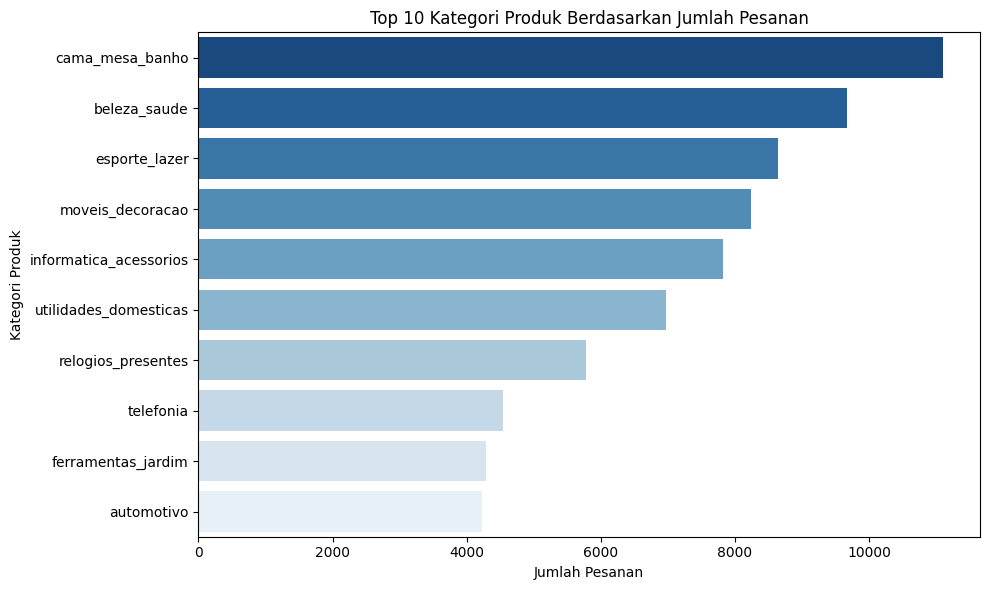

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pesanan per kategori
order_counts = sales_df['product_category_name'].value_counts().head(10).reset_index()
order_counts.columns = ['product_category_name', 'order_count']

plt.figure(figsize=(10,6))
sns.barplot(data=order_counts, x='order_count', y='product_category_name', palette='Blues_r')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pesanan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()


/tmp/ipython-input-137-759707252.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_category, x='total_revenue', y='product_category_name', palette='Greens_r')


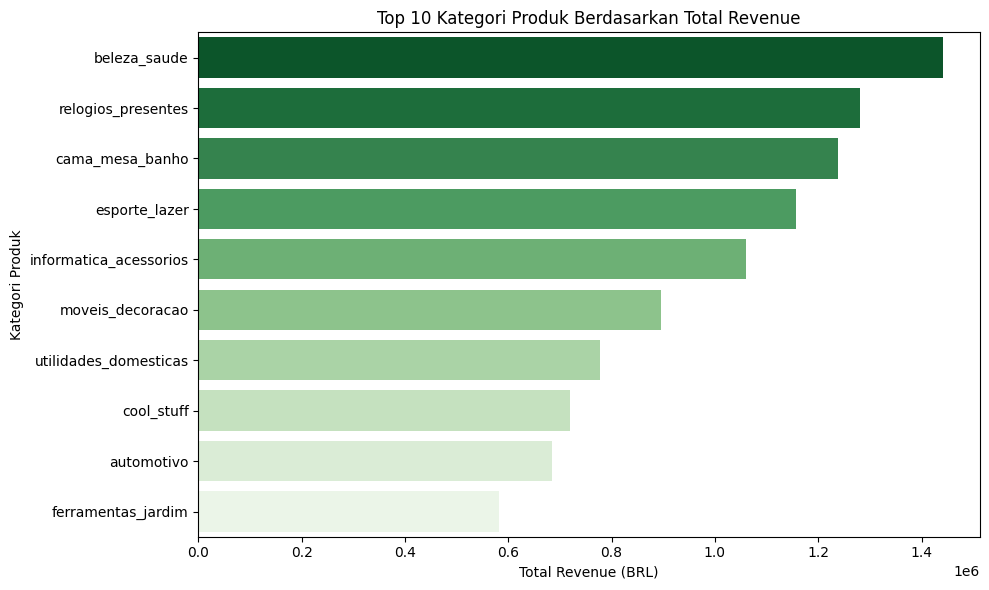

In [137]:
revenue_by_category = (
    sales_df.groupby('product_category_name')['total_revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=revenue_by_category, x='total_revenue', y='product_category_name', palette='Greens_r')
plt.title('Top 10 Kategori Produk Berdasarkan Total Revenue')
plt.xlabel('Total Revenue (BRL)')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

/tmp/ipython-input-138-907212936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration, x='review_score', y='delivery_duration', palette='OrRd')


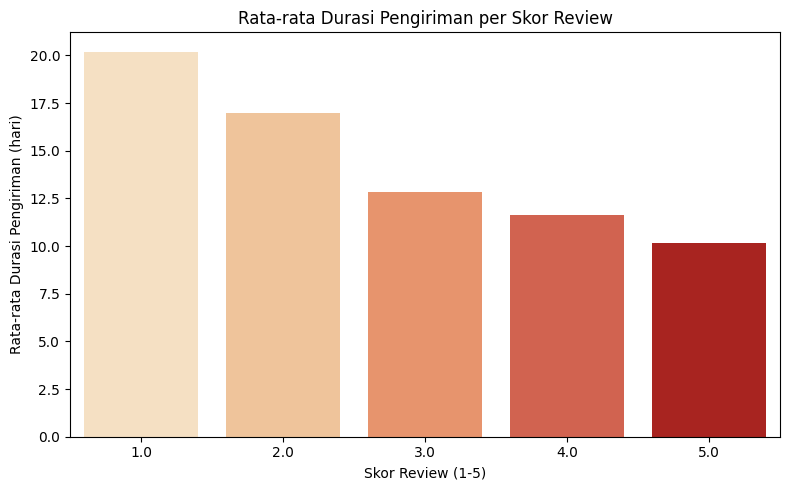

In [138]:
avg_duration = sales_review_df.groupby('review_score')['delivery_duration'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_duration, x='review_score', y='delivery_duration', palette='OrRd')
plt.title('Rata-rata Durasi Pengiriman per Skor Review')
plt.xlabel('Skor Review (1-5)')
plt.ylabel('Rata-rata Durasi Pengiriman (hari)')
plt.tight_layout()
plt.show()

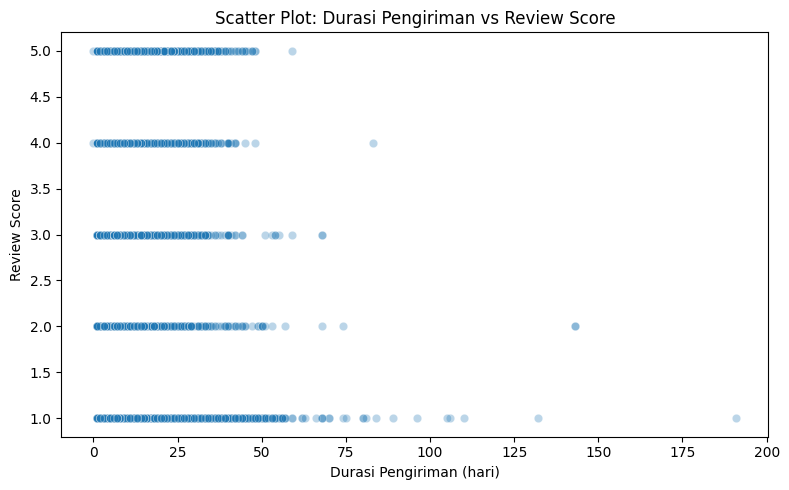

In [139]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=sales_review_df, x='delivery_duration', y='review_score', alpha=0.3)
plt.title('Scatter Plot: Durasi Pengiriman vs Review Score')
plt.xlabel('Durasi Pengiriman (hari)')
plt.ylabel('Review Score')
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [140]:
rfm_df = sales_df[['customer_id', 'order_purchase_timestamp', 'total_revenue']]

rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

/tmp/ipython-input-140-454386434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])


In [144]:
snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
rfm_table = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'customer_id': 'count',                                                # Frequency
    'total_revenue': 'sum'                                                 # Monetary
})

# Rename kolom
rfm_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'customer_id': 'Frequency',
    'total_revenue': 'Monetary'
}, inplace=True)

rfm_table = rfm_table.reset_index()
rfm_table.head()

,customer_id,Recency,Frequency,Monetary
0,000161a058600d5901f007fab4c27140,410,1,67.41
1,000379cdec625522490c315e70c7a9fb,149,1,107.01
2,0005aefbb696d34b3424dccd0a0e9fd0,71,1,147.33
3,00146ad30454993879adaa91c518f68c,233,1,221.79
4,0018c09f333634ca9c80d9ff46e43e9c,59,1,56.87


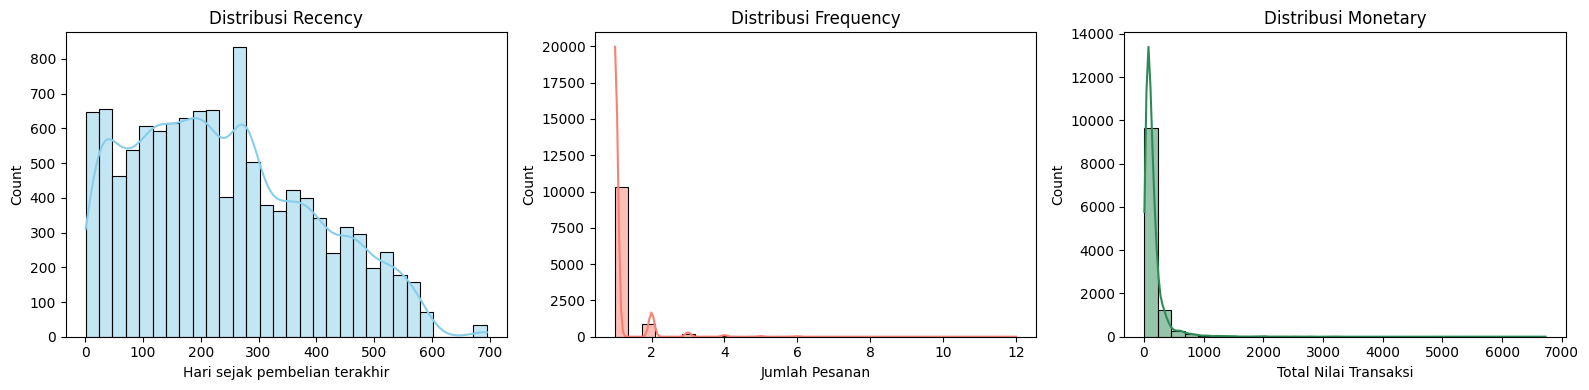

In [145]:
plt.figure(figsize=(16, 4))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Recency')
plt.xlabel('Hari sejak pembelian terakhir')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Frequency'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Frequency')
plt.xlabel('Jumlah Pesanan')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Monetary'], bins=30, kde=True, color='seagreen')
plt.title('Distribusi Monetary')
plt.xlabel('Total Nilai Transaksi')

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
Kategori "cama_mesa_banho" adalah kategori paling banyak dipesan. Namun, kategori "beleza_saude" dan "relogios_presentes" menonjol dalam total revenue. Hal ini berarti meskipun kurang populer, ada kategori produk yang punya nilai transaksi lebih tinggi per item.
- Conclution pertanyaan 2
Terdapat korelasi negatif sebesar -0.34 antara delivery_duration dan review_score. Artinya: semakin lama pengiriman, semakin rendah skor review dari pelanggan. Rata-rata durasi pengiriman tertinggi ditemukan pada review score 1 dan 2, sedangkan review score 4 dan 5 memiliki durasi lebih cepat.

In [146]:
sales_df.to_csv("sales_data.csv", index=False)

#optional
sales_review_df.to_csv("sales_review_data.csv", index=False)